### Solve the following set of problems using Python.

#### Part 1

Load data from digitData2.csv file. The last column of each file presents the label and the rest of the columns are features.
1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.
2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.
3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again, compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).
4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions. <br>


#### Solution

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dData = pd.read_csv("digitData2.csv")
dData
#Importing the dataset and displaying

,0.000000000000000000e+00,0.000000000000000000e+00.1,5.000000000000000000e+00,1.300000000000000000e+01,9.000000000000000000e+00,1.000000000000000000e+00,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,...,0.000000000000000000e+00.23,0.000000000000000000e+00.24,0.000000000000000000e+00.25,6.000000000000000000e+00,1.300000000000000000e+01.2,1.000000000000000000e+01.2,0.000000000000000000e+00.26,0.000000000000000000e+00.27,0.000000000000000000e+00.28,0.000000000000000000e+00.29
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
2,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
4,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7.0
1523,0.0,0.0,9.0,9.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,16.0,11.0,1.0,0.0,5.0
1524,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,4.0
1525,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4.0


From above we can see the data columns are in exponential format and also there is a chance for the data to be also in exponetial format, pandas will convert the data value automatically to numerical form but for the sake of readability and to confirm the format we will explicitly convert the format

In [3]:
dData = dData.apply(lambda x:pd.to_numeric(x,errors= 'coerce')) #Converting each column to numeric format explicitly using anonymous function
dData

,0.000000000000000000e+00,0.000000000000000000e+00.1,5.000000000000000000e+00,1.300000000000000000e+01,9.000000000000000000e+00,1.000000000000000000e+00,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,...,0.000000000000000000e+00.23,0.000000000000000000e+00.24,0.000000000000000000e+00.25,6.000000000000000000e+00,1.300000000000000000e+01.2,1.000000000000000000e+01.2,0.000000000000000000e+00.26,0.000000000000000000e+00.27,0.000000000000000000e+00.28,0.000000000000000000e+00.29
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
2,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
4,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7.0
1523,0.0,0.0,9.0,9.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,16.0,11.0,1.0,0.0,5.0
1524,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,4.0
1525,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4.0


In [4]:
#We have converted the datavalues lets check the column names whether they convey any meaning or not
dC = dData.columns
dC

Index(['0.000000000000000000e+00', '0.000000000000000000e+00.1',
       '5.000000000000000000e+00', '1.300000000000000000e+01',
       '9.000000000000000000e+00', '1.000000000000000000e+00',
       '0.000000000000000000e+00.2', '0.000000000000000000e+00.3',
       '0.000000000000000000e+00.4', '0.000000000000000000e+00.5',
       '1.300000000000000000e+01.1', '1.500000000000000000e+01',
       '1.000000000000000000e+01', '1.500000000000000000e+01.1',
       '5.000000000000000000e+00.1', '0.000000000000000000e+00.6',
       '0.000000000000000000e+00.7', '3.000000000000000000e+00',
       '1.500000000000000000e+01.2', '2.000000000000000000e+00',
       '0.000000000000000000e+00.8', '1.100000000000000000e+01',
       '8.000000000000000000e+00', '0.000000000000000000e+00.9',
       '0.000000000000000000e+00.10', '4.000000000000000000e+00',
       '1.200000000000000000e+01', '0.000000000000000000e+00.11',
       '0.000000000000000000e+00.12', '8.000000000000000000e+00.1',
       '8.00000000

From above we can observe they dont give any meaning since most of them are in not proper exponential format, but we will rename it for the sake of readability.

In [5]:
new_col = ['col_'+str(i+1) for i in range(len(dData.columns))]
dData.columns = new_col  #Adding col_ as prefix and giving column number as prefix

In [6]:
dData

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
2,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
4,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7.0
1523,0.0,0.0,9.0,9.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,16.0,11.0,1.0,0.0,5.0
1524,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,4.0
1525,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0,4.0


In [7]:
dData.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22',
       'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29',
       'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36',
       'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43',
       'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50',
       'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57',
       'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64',
       'col_65'],
      dtype='object')

In [8]:
dData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   1527 non-null   float64
 1   col_2   1527 non-null   float64
 2   col_3   1527 non-null   float64
 3   col_4   1527 non-null   float64
 4   col_5   1527 non-null   float64
 5   col_6   1527 non-null   float64
 6   col_7   1527 non-null   float64
 7   col_8   1527 non-null   float64
 8   col_9   1527 non-null   float64
 9   col_10  1527 non-null   float64
 10  col_11  1527 non-null   float64
 11  col_12  1527 non-null   float64
 12  col_13  1527 non-null   float64
 13  col_14  1527 non-null   float64
 14  col_15  1527 non-null   float64
 15  col_16  1527 non-null   float64
 16  col_17  1527 non-null   float64
 17  col_18  1527 non-null   float64
 18  col_19  1527 non-null   float64
 19  col_20  1527 non-null   float64
 20  col_21  1527 non-null   float64
 21  col_22  1527 non-null   float64
 22  

Checked for NaN value if any caused during conversion. Now lets dive into the specific questions mentioned


<b>1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.</b>

Silhouette Coefficient is the measure of how similar an instance is with its own cluster and other clusters<b>(Silhouette (clustering)(2023):para2)</b>.
If Silhouette Coefficient is closer to 1 then clusters are well apart and closer to -1 indicates instance is in wrong cluster

In [10]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


In [11]:
X = dData.iloc[:,:-1]
y = dData.iloc[:,-1]  
#Splitting feature and target variable

In [12]:
#Since our feature values can be of different range of values it is a good practise to Scale the data values.
#Here we are using MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X) #Transformed the features into a range of values

KMeans clustering uses n clusters to group dataset.
So we are selecting a range of clusters <b>(K-Mean: Getting the Optimal Number of Clusters (2023):Silhouette Analysis)</b> to be formed and will choose an optimum k value

In [13]:

k_cluster = range(2,25)
#We need to store silhouette coefficient for each k value so an array is needed
s_score =[]

In [14]:
#Cluster for each Kvalue
for x in k_cluster:
    model = KMeans(n_clusters=x)
    model.fit(X_transform)
    y_targ = model.predict(X_transform)
    
    #Silhouette_score for each cluster
    s_score.append(silhouette_score(X_transform,y_targ))


In [15]:
#Since we have s_score for different k values we can find the highest score and its corresponding kvalue to find the optimum kvalue
max_sscore =max(s_score)
print("The maximum Silhouette Coefficient is :",max_sscore)
op_val = k_cluster[s_score.index(max_sscore)]
print("The optimum k value for the maximum Silhouette Coefficient ",max_sscore," is :",op_val)



The maximum Silhouette Coefficient is : 0.19382044073012433
The optimum k value for the maximum Silhouette Coefficient  0.19382044073012433  is : 9


That means 9 cluster will give the best output with Silhouette score of 0.19385745168600743   

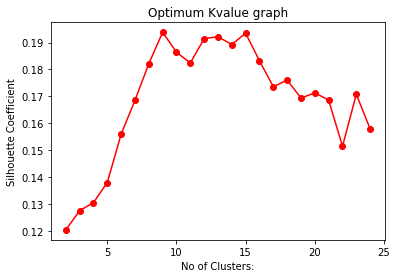

In [16]:
#Now lets plot this on the graph
plt.plot(k_cluster,s_score,'ro-')
plt.xlabel("No of Clusters:")
plt.ylabel("Silhouette Coefficient")
plt.title("Optimum Kvalue graph")
plt.show()

<b> 2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.</b>

Kmeans++ algorithm is used for initial centroid selection for the Kmeans algorithm which uses random selection

In [17]:
#The optimal Kvalue found was 9 so we use that for both model creation
km = KMeans(n_clusters=9) #Model for Kmeans
km_pp = KMeans(n_clusters=9,init='k-means++') #Model for Kmeans++

km.fit(X_transform)
km_pre = km.predict(X_transform)

km_pp.fit(X_transform)
km_pp_pre =km_pp.predict(X_transform)

#Fitting and predicting both models


There are different evaluation metrics we can use for Kmeans such as Silhouette Coefficient, Rand Index, Purity etc. We will use some to compare the results.

In [18]:
KM_sscore = silhouette_score(X_transform,km_pre)
print("The Silhouette Coefficient of KMeans is :", KM_sscore)
KMPP_sscore = silhouette_score(X_transform,km_pp_pre)
print("The Silhouette Coefficient of KMeans++ is :", KMPP_sscore)


The Silhouette Coefficient of KMeans is : 0.1938620637604385
The Silhouette Coefficient of KMeans++ is : 0.1938688029047783


In [19]:
#Adjusted RandIndex 
from sklearn.metrics import adjusted_rand_score

KM_arscore = adjusted_rand_score(y,km_pre)
KMPP_arscore = adjusted_rand_score(y,km_pp_pre)

print("The adjusted Rand Index Score of KMeans is :",KM_arscore)
print("The adjusted Rand Index Score of KMeans++ is :",KMPP_arscore)
#The adjusted rand index unlike other metrics use a ground truth cluster, then both the cluster we created and ground cluster is compared and scored.


The adjusted Rand Index Score of KMeans is : 0.6077876549569388
The adjusted Rand Index Score of KMeans++ is : 0.6052972002703568


In [20]:
#We can calculate the purity of cluster
from sklearn.metrics.cluster import contingency_matrix

cm = contingency_matrix(y,km_pre) #Calculating the contingency matrix for kmeans
cm_pp = contingency_matrix(y,km_pp_pre) #Calculating the contingency matrix for kmeans

purity_km = np.sum(np.amax(cm,axis=0))/np.sum(cm)
purity_kmpp = np.sum(np.amax(cm_pp,axis=0))/np.sum(cm_pp)

print("The purity of KMeans is :",purity_km)
print("The purity of KMeans++ is:",purity_kmpp)


The purity of KMeans is : 0.7406679764243614
The purity of KMeans++ is: 0.7387033398821218


In [21]:
ev_score = pd.DataFrame(data={'KMeans':[KM_sscore,KM_arscore,purity_km],'KMeans++':[KMPP_sscore,KMPP_arscore,purity_kmpp]},
                        index={"Silhouette","Adjusted RandIndex","Purity"})
ev_score

,KMeans,KMeans++
Silhouette,0.193862,0.193869
Adjusted RandIndex,0.607788,0.605297
Purity,0.740668,0.738703


The above is some metric evaluation of both KMeans and KMeans++ . As we can see both type clustering have similar metric values. There is no significant difference between KMeans and KMeans++.

<b>3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again, compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).</b>

In [22]:
#For repeating 50 times we use loop
new_sscore =[]
ar_score =[]
pscore =[]
for i in range(50):
    km_new = KMeans(n_clusters=9) #Model for Kmeans
    km_new.fit(X_transform)
    km_new_pre = km_new.predict(X_transform)
    
    #Silhouette
    new_sscore.append(silhouette_score(X_transform,km_new_pre)) 
    
    #randindex
    ar_score.append(adjusted_rand_score(y,km_new_pre))
    
    #Purity
    cm_new = contingency_matrix(y,km_new_pre) #Calculating the contingency matrix for kmeans
    pscore.append(np.sum(np.amax(cm_new,axis=0))/np.sum(cm_new))
    
k_avg = sum(new_sscore)/50
ar_avg = sum(ar_score)/50
p_avg = sum(pscore)/50
print("Average Silhouette score of 50 iterations of KMeans is :",k_avg)
print("Average Adjusted RandIndex score of 50 iterations of KMeans is :",ar_avg)
print("Average Purity score of 50 iterations of KMeans is :",p_avg)
    

Average Silhouette score of 50 iterations of KMeans is : 0.19341850955954074
Average Adjusted RandIndex score of 50 iterations of KMeans is : 0.6051615804389149
Average Purity score of 50 iterations of KMeans is : 0.7390700720366731


In [23]:
ev_score['Avg KMean'] = [k_avg,ar_avg,p_avg]
ev_score

,KMeans,KMeans++,Avg KMean
Silhouette,0.193862,0.193869,0.193419
Adjusted RandIndex,0.607788,0.605297,0.605162
Purity,0.740668,0.738703,0.739070


We can clearly see from the above dataframe that the Average of 50 Kmean clustering we are getting close to the same result as KMeans++ where the centroid are not randomly initialised. There is no significant difference between three.

<b>4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.</b>

In [24]:
#There are different method to find the optimal value like Elbow Method, GridSearch, Evaluation Metrics over range of values etc.
#Here we are using elbow method to find optimum eps and min_samples
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [25]:
nn = NearestNeighbors(n_neighbors=6) #We are taking 6 neighbors as randomly
nnbrs = nn.fit(X_transform)
dist, ind = nnbrs.kneighbors(X_transform) #We get the distance between datapoints and its nearest neighbour

In [26]:
dist = np.sort(dist,axis=0)  #Sorting the distance in ascending order
dist = dist[:,1]
dist   

array([0.47186465, 0.47186465, 0.49607837, ..., 2.01317756, 2.07719002,
       2.1079751 ])

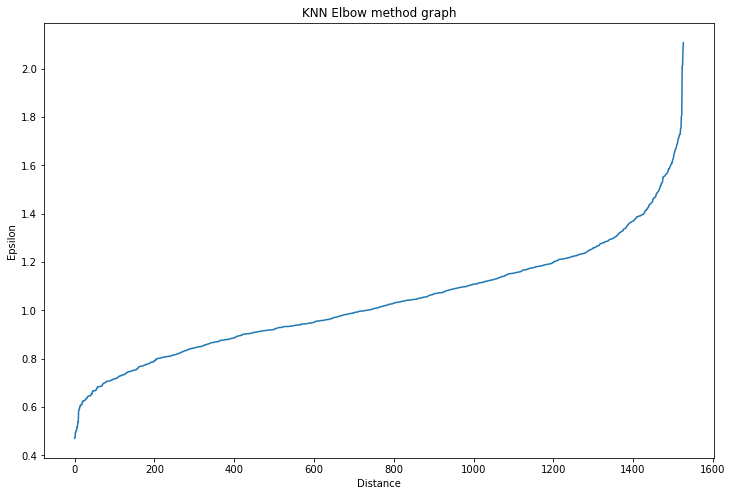

In [27]:
plt.figure(figsize=(12,8)) #Ploting the elbow graph for optimal eps
plt.plot(dist)
plt.title("KNN Elbow method graph")
plt.xlabel("Distance")
plt.ylabel("Epsilon")
plt.show()

In [28]:
# From the graph we can observe the optimal eps =1.3 where the point of maximum curvature lies.
print("The Optimal eps = 1.3")

The Optimal eps = 1.3


In [29]:
#Now inorder to find the optimal minimum_sample we will use silhouette metric over a range of values via iteration and
#will choose the one with max silhouette score
min_samp = range(2,25)
db_ss = []

In [30]:
for i in min_samp:
    dbscan = DBSCAN(eps=1.3, min_samples=i)
    labels = dbscan.fit_predict(X_transform)
    if len(np.unique(labels)) >1:
        db_ss.append(silhouette_score(X_transform, labels))
    else:
        db_ss.append(-1)
        

In [31]:
opt_ms = min_samp[np.argmax(db_ss)]  #Taking the maximum silhouetter score over the range of values
print("The optimal minimum_sample = ",opt_ms)

The optimal minimum_sample =  4


In [32]:
#Now inorder to find the number of clusters we need to perform DBSCAN with these parameters
n_dbscan = DBSCAN(eps=1.3, min_samples=4)
n_dbscan.fit(X_transform)
n_labels = n_dbscan.labels_


In [33]:
pd.value_counts(n_labels).size #The total number of clusters

25

In [34]:
pd.value_counts(n_labels) #Number of values in each cluster

-1     265
 2     147
 3     146
 5     130
 1     124
 7     118
 6     113
 0     102
 9      85
 4      56
 8      47
 14     43
 12     33
 18     27
 10     21
 16     13
 17     11
 19     10
 15      7
 13      7
 21      6
 20      5
 11      4
 22      4
 23      3
dtype: int64

The number of cluster found using KMeans was 9 but the DBSCAN gave us 25 clusters. DBSCAN have the ability to point out the noise in the data,<b>(How to Master the Popular DBSCAN Clustering Algorithm for Machine Learning (2020):Why do we need DBSCAN Clustering?)</b> here we got 265 datapoints which do not belong to any cluster. The jump of cluster from 9 to 25 can conclude that DBSCAN can capture more fined data structures. The chance of outliers is also high which resulted in the noise.

##### Part 2

Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.
1. What is the variance (%) covered by the first 3 components? How is this percentage of variance computed?
2. Is there any correlation between these three components?
3. Apply t-SNE on the same dataset, select the first 3 components and plot them.
4. Report the comparison between the results obtained using t-SNE and PCA

<b>Solution</b>

In [35]:
#Loading the dataset
from sklearn import datasets

df = datasets.load_diabetes(as_frame=True)

In [36]:
df.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [37]:
df.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [38]:
dd = pd.DataFrame(data=df.data,columns=df.feature_names)
dd

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [39]:
#Since we are using PCA target variable is not added, we will do it later.

In [40]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


There are total 10 features and none of them have null values. Total 442 rows or set of data present.

In [41]:
dd.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


From above we can observe that the column 'sex' was supposed to be a categorical variable and the feature 'age' shouldn't contain decimal values. And most of the data value is in range of -0 to 1. It is because the data have already been normalized or scaled. And every data have same standard deviation.

In [42]:
#But inorder for performing proper PCA we are Scaling explicitly using StandardScaler,
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(dd)
new_dd = sc.transform(dd)

In [43]:
dd_transformed = pd.DataFrame(data=new_dd, 
                                columns=df.feature_names)
 
dd_transformed.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
5,-1.948811,-0.938537,-0.855583,-0.408747,-1.450445,-1.666931,0.867796,-1.606102,-0.865768,-2.025562


In [44]:
dd_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-9.544904e-18,1.001133,-2.254290,-0.784172,0.113172,0.800500,2.327895
sex,442.0,-4.219852e-17,1.001133,-0.938537,-0.938537,-0.938537,1.065488,1.065488
bmi,442.0,-5.525997e-17,1.001133,-1.897929,-0.719625,-0.153132,0.656952,3.585718
bp,442.0,-4.822688e-17,1.001133,-2.363066,-0.770658,-0.119218,0.749369,2.776071
s1,442.0,5.525997e-18,1.001133,-2.665411,-0.720020,-0.090841,0.596193,3.235851
s2,442.0,-1.356381e-17,1.001133,-2.430626,-0.638249,-0.080291,0.627442,4.179278
s3,442.0,-2.813235e-17,1.001133,-2.150883,-0.738296,-0.138431,0.616239,3.809072
s4,442.0,-1.484484e-16,1.001133,-1.606102,-0.830301,-0.054499,0.721302,3.894331
s5,442.0,-1.849325e-17,1.001133,-2.651046,-0.699016,-0.040947,0.681870,2.808758
s6,442.0,-2.675085e-17,1.001133,-2.896390,-0.697549,-0.022657,0.586922,2.851075


In [45]:
#do the PCA for n=3, and plot the data.

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(dd_transformed)
p_label = pca.transform(dd_transformed)

In [46]:
p_label.shape #New dimension of dataset

(442, 3)

In [47]:
dd_pca = pd.DataFrame(data=p_label) #The new dataframe after PCA
dd_pca

,0,1,2
0,0.587208,-1.946828,0.589233
1,-2.831612,1.372085,0.027915
2,0.272148,-1.634898,0.739270
3,0.049310,0.382253,-2.013037
4,-0.756451,0.811968,-0.057259
...,...,...,...
437,1.239531,-1.035955,0.928691
438,1.264676,0.761301,-1.750210
439,-0.205246,-1.205446,0.496078
440,0.692866,0.210117,-0.868730


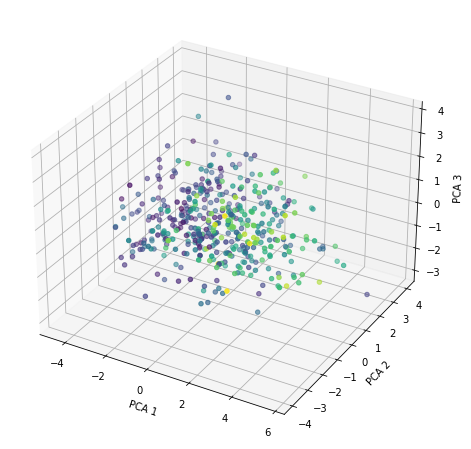

In [48]:
#Plotting the scatterplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot( projection='3d')
ax.scatter(dd_pca[0], dd_pca[1], dd_pca[2], c=df['target'])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

<b>1. What is the variance (%) covered by the first 3 components? How is this percentage of variance computed? </b>

In [49]:
#We can calculate it by var() function over each component
#It is sum of  variance of all the components divided by the sum of variance of orginal dataset

n_var = (np.var(dd_pca[0]) + np.var(dd_pca[1]) + np.var(dd_pca[2]))
d_var = dd_transformed.var(axis=0).sum()
q_var = n_var/d_var
print(q_var)

#There might be difference in decimal since different precision

0.6707285458342962


We have inbuilt function to find the variance ratio. <b>(PCA Explained Variance Concepts with Python Example(2023):What is Explained Variance?)</b>

In [50]:

evr = pca.explained_variance_ratio_
evr

array([0.40242142, 0.14923182, 0.12059623])

In [51]:
total_evr = sum(evr)
total_evr  # This is the total sum of explained variance

0.6722494722420844

In [52]:
ev_df = pd.DataFrame(data={"Percentage of Variance":[evr[0]*100,evr[1]*100,evr[2]*100,sum(evr)*100]},
                     index=['PCA1','PCA2','PCA3','TOTAL'])
    
ev_df

,Percentage of Variance
PCA1,40.242142
PCA2,14.923182
PCA3,12.059623
TOTAL,67.224947


In [53]:
#We can compute this variance using eigenvector and eigenvalues

cm =np.cov(dd_transformed.T) #Covariance matrix
cm

array([[ 1.00226757,  0.17413106,  0.18550436,  0.33618732,  0.26065053,
         0.21974029, -0.07535145,  0.20430312,  0.27139079,  0.3024152 ],
       [ 0.17413106,  1.00226757,  0.08836131,  0.24155968,  0.03535681,
         0.1429607 , -0.37994924,  0.33286819,  0.15025751,  0.20860517],
       [ 0.18550436,  0.08836131,  1.00226757,  0.39631195,  0.25034381,
         0.26176213, -0.36764275,  0.41474494,  0.44717035,  0.38956135],
       [ 0.33618732,  0.24155968,  0.39631195,  1.00226757,  0.24301953,
         0.18597859, -0.17916656,  0.25823761,  0.39437038,  0.39131471],
       [ 0.26065053,  0.03535681,  0.25034381,  0.24301953,  1.00226757,
         0.89869621,  0.05163619,  0.54343678,  0.5166697 ,  0.32645534],
       [ 0.21974029,  0.1429607 ,  0.26176213,  0.18597859,  0.89869621,
         1.00226757, -0.1969006 ,  0.66131307,  0.31907529,  0.29125933],
       [-0.07535145, -0.37994924, -0.36764275, -0.17916656,  0.05163619,
        -0.1969006 ,  1.00226757, -0.74016732

In [54]:
#Finding the eigenvector and eigenvalue
e_val,e_vect = np.linalg.eig(cm)

In [55]:
e_val

array([4.03333938, 1.49570218, 1.20869692, 0.957643  , 0.00857994,
       0.07849751, 0.66368713, 0.43466661, 0.60408592, 0.53777715])

In [56]:
e_valsorted = np.sort(e_val)[::-1] #Sorted in descending order
e_valsorted

array([4.03333938, 1.49570218, 1.20869692, 0.957643  , 0.66368713,
       0.60408592, 0.53777715, 0.43466661, 0.07849751, 0.00857994])

In [57]:
# Percentage of variance explained by each component using the eigenvalues
compute_evr = e_valsorted / np.sum(e_valsorted)
compute_evr #This is variance of all feature but we want 3

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

In [58]:
sum(compute_evr) #We will get 1 as output

1.0

In [59]:
#Now since we want first 3, we will find the total of first 3
total_eigen_evr = np.sum(compute_evr[:3]) * 100
total_eigen_evr

67.22494722420839

In [60]:
print("The % of variance explained by first 3 components (using explained_variance_ratio_)")
print(f"\nPCA 1 : {evr[0]*100:.2f}%" )
print(f"\nPCA 2 : {evr[1]*100:.2f}%" )
print(f"\nPCA 3 : {evr[2]*100:.2f}%" )
print(f"\nThe Total percentage of variance explained: {sum(evr)*100:.2f}%")

The % of variance explained by first 3 components (using explained_variance_ratio_)

PCA 1 : 40.24%

PCA 2 : 14.92%

PCA 3 : 12.06%

The Total percentage of variance explained: 67.22%


In [61]:
print("The % of variance explained by first 3 components (using eigenvalue)")
print(f"\nPCA 1 : {compute_evr[0]*100:.2f}%" )
print(f"\nPCA 2 : {compute_evr[1]*100:.2f}%" )
print(f"\nPCA 3 : {compute_evr[2]*100:.2f}%" )
print(f"\nThe Total percentage of variance explained: {sum(evr)*100:.2f}%")

The % of variance explained by first 3 components (using eigenvalue)

PCA 1 : 40.24%

PCA 2 : 14.92%

PCA 3 : 12.06%

The Total percentage of variance explained: 67.22%


<b>2. Is there any correlation between these three components?</b>

In [62]:
#After PCA there shouldn't be any correlation between the components, however we will confirm it by correlation coefficient.

corr = np.corrcoef(dd_pca,rowvar=False)
corr

array([[ 1.00000000e+00, -1.86956913e-16,  5.03511755e-16],
       [-1.86956913e-16,  1.00000000e+00, -6.41097563e-16],
       [ 5.03511755e-16, -6.41097563e-16,  1.00000000e+00]])

In [63]:
corr_df = pd.DataFrame(corr, columns= ["PCA1","PCA2","PCA3"],index=["PCA1","PCA2","PCA3"])
corr_df #Storing the correlation value to a dataframe for better visualization

,PCA1,PCA2,PCA3
PCA1,1.000000e+00,-1.869569e-16,5.035118e-16
PCA2,-1.869569e-16,1.000000e+00,-6.410976e-16
PCA3,5.035118e-16,-6.410976e-16,1.000000e+00


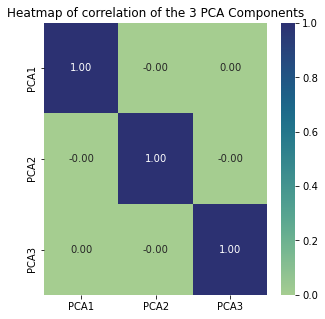

In [64]:
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(corr_df,cmap="crest",fmt='.2f',annot=True)  #Plotting the correlation coefficient in a heatmap for better visualization
plt.title("Heatmap of correlation of the 3 PCA Components") 
plt.show()

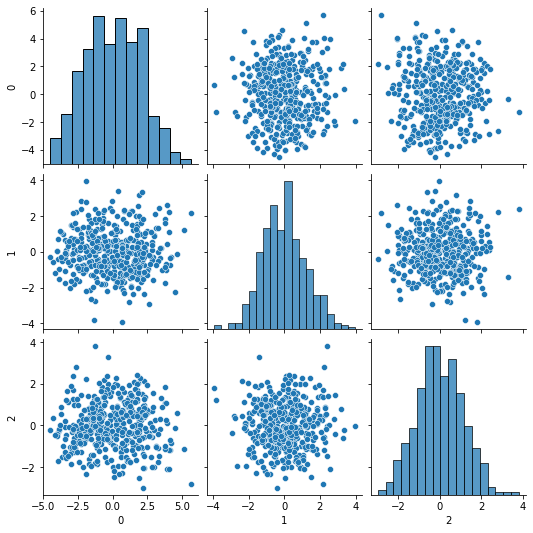

In [65]:
sns.pairplot(dd_pca)

From the above two graphical visualizations and the correlation coefficent value shows no significant correlation between the three components.

<b>3. Apply t-SNE on the same dataset, select the first 3 components and plot them.</b>

In [66]:
#t-SNE (t-distributed Stochastic Neighbor Embedding) is another dimensionality reduction method
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 3,random_state=8)
tsne_out = tsne.fit_transform(dd_transformed)


C:\Users\kisho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kisho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [67]:
tsne_df = pd.DataFrame(data=tsne_out)
tsne_df

,0,1,2
0,-18.273933,-1.995462,-135.382355
1,68.815681,-64.644730,8.370013
2,37.209770,-53.810543,-37.282722
3,-12.161199,46.391815,45.438782
4,-23.751741,95.041618,27.083017
...,...,...,...
437,30.220428,29.094006,96.905304
438,-1.090959,-74.106186,20.329641
439,-7.659562,-29.077585,-61.652096
440,-47.375946,33.241600,21.634056


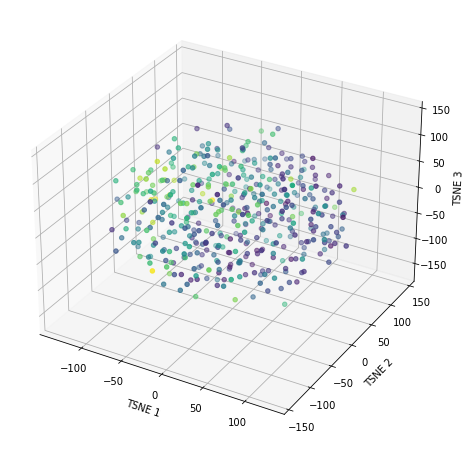

In [68]:
#Lets plot the 3 components
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')
ax1.scatter(tsne_df[0], tsne_df[1], tsne_df[2], c=df['target'])
ax1.set_xlabel('TSNE 1')
ax1.set_ylabel('TSNE 2')
ax1.set_zlabel('TSNE 3')
plt.show()

We can observe from the above plot that similar points are grouped together

<b>4. Report the comparison between the results obtained using t-SNE and PCA</b>

Both are dimensionality reduction methods. PCA deals with linear dimensions wheras t-SNE deals with non-linear data.

From our above observation for both we can conclude some details.
* PCA was a good method when we needed to find the variance of the reduced dimensions. It gave a structural understanding. It was able to handle our 10 features and reduced it to 3 without loosing the structure of the data. PCA components usually tends to show no relationships inbetween. It gave insights of the data eventhough 10 features was reduced to 3.
* t-SNE was good at providing dimensionally reduced non linear data where the relationship between each feature was intact<b>(Introduction to t-SNE (2023):t-SNE vs PCA)</b>. In t-SNE related or similar datapoints are grouped closer and different datapoints are placed in distant. t-SNE is good at visualization as it gave underlying patterns for complex data via the graphs.
* We can clearly see in the PCA plot that the datapoints are scattered allover and it was difficult to convey any meaning from the graphical representation even though the dimension was reduced for easier understanding. We can conclude from this that by doing PCA the relations between datapoints are diminished.
* But in our t-SNE plot the datapoints are more kindly grouped together and it is easier to understand the nature of the datapoints. The relation between datapoints are still visible even after dimensional reduction. We can conclude that t-SNE dimensional reduction didn't affect the original nature of the data.<br><br>
The decision to choose which depend on the practical application

## <u>Reference List</u>

Analytics Vidhya(8 September 2023)How to Master the Popular DBSCAN Clustering Algorithm for Machine Learning,accessed 22 July 2023.<br>
https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/<br><br>

Analytics Vidhya(13 April 2023) K-Mean: Getting the Optimal Number of Clusters, accessed 22 July 2023. <br>
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/<br><br>

Datacamp (March 2023)Introduction to t-SNE, accessed 22 July 2023<br>
https://www.datacamp.com/tutorial/introduction-t-sne<br><br>

Vitafluz (14 April 2023)PCA Explained Variance Concepts with Python Example, accessed 22 July 2023<br>
https://vitalflux.com/pca-explained-variance-concept-python-example/<br><br>

Wikipedia(17 May 2023) Silhouette (clustering), accessed 22 July 2023.<br>
https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20value%20is%20a,poorly%20matched%20to%20neighboring%20clusters.<br><br>